0.9911838202977805
24.796099146071416


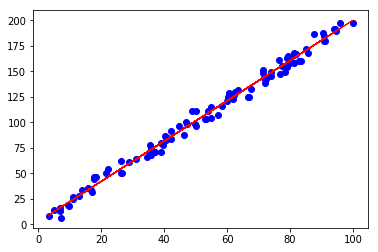

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

df=pd.read_csv('data_1d.csv',header=None).rename(columns = {0:'Quantity',1:'Revenue'})
df

# 建立线性回归模型
regr = linear_model.LinearRegression()

# 拟合
regr = regr.fit(df['Quantity'].values.reshape(-1,1),df['Revenue'])   #linear_model.LinearRegression()  (x,y) 
# 注意此处.reshape(-1, 1)，因为X是一维的！

# 不难得到直线的斜率、截距
a, b = regr.coef_, regr.intercept_

# let's calculate the predicted Y

#Yhat = a*df['Quantity'].values + b  #Yhat=np.array(Yhat)
Yhat=regr.predict(df['Quantity'].values.reshape(-1,1))

# 1.真实的点
plt.scatter(df['Quantity'], df['Revenue'], color='blue')

# 2.拟合的直线
plt.plot(df['Quantity'], Yhat, color='red', linewidth=1)


print(sklearn.metrics.r2_score(df['Revenue'],Yhat))   #r2_score(y_test, y_pred)
print(sklearn.metrics.mean_squared_error(df['Revenue'],Yhat))


,Region,Response Day,Avg_Res
0,APAC,0,0.035096
1,APAC,1,0.011668
2,APAC,2,0.014689
3,APAC,3,0.008012
4,APAC,4,0.001773
5,APAC,5,0.017839
6,APAC,6,0.003603
7,APAC,7,0.012616
8,APAC,9,0.001567
9,APAC,10,0.004702


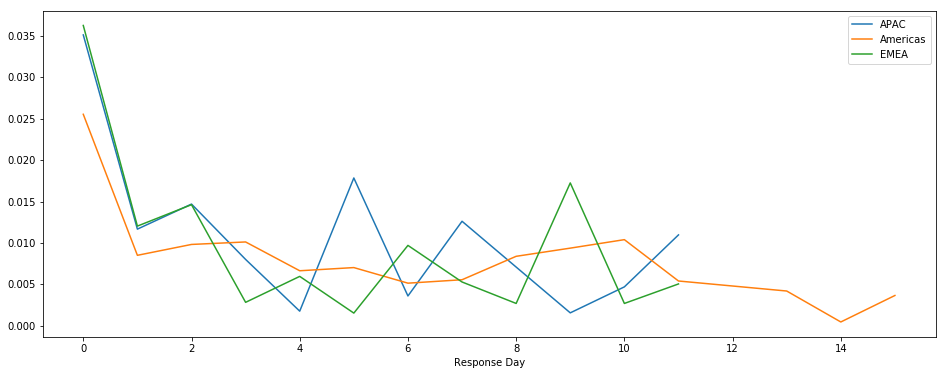

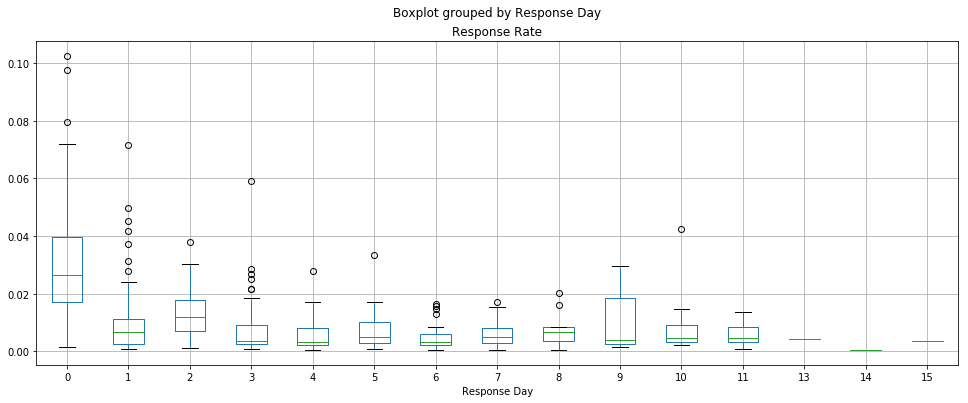

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('Book1.csv').dropna()
#df['Response Day']=df['Response Day'].astype(str)

cols=['ID','Response Day','Region','Links']
df=df.loc[(df['ID'].str.len()==10)&(df['Region'].isin(['Americas','APAC','EMEA'])),cols].reset_index()

df1=pd.DataFrame({'Participants' : df.groupby(['ID','Response Day','Region'])['Links'].size()}).reset_index()


df3=pd.read_csv('Book2.csv',encoding='latin-1').loc[:,['Game ID','# of Invites']]\
.rename(columns = {'Game ID':'ID','# of Invites':'Invites'})

df4=df1.merge(df3,on=['ID'],how='left')
df4['Response Rate']=df4['Participants']/df4['Invites']

df5=pd.DataFrame({'Avg_Res': df4.groupby(['Region','Response Day'])['Response Rate'].agg(np.mean)}).reset_index()

fig, ax=plt.subplots(figsize=(16,6))

for key, data in df5.groupby(['Region']):
    ax = data.plot(ax=ax, kind='line', x='Response Day',y='Avg_Res',label=key)
    
fig, ax1=plt.subplots(figsize=(16,6))    
df4.boxplot(by='Response Day',column=['Response Rate'],ax=ax1)

df5